Enter the name of the city


 Bosten


Enter the name of the state or country where the city is located


 MA


Enter the date (yyyy-mm-dd) you would like to see


 2018-05-09


The link to your picture ishttps://api.nasa.gov/planetary/earth/imagery?lon=6.0448459&lat=50.8333558&date=2018-05-09&dim=0.15&api_key=DEMO_KEY


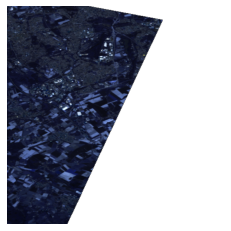

Enter the name of the city


In [ ]:
## import libraries to be used later
# pip install opencage
from opencage.geocoder import OpenCageGeocode
import requests
import sys
import datetime
import urllib.request
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import urlretrieve


####
## Earth requests
####
# base url for NASA Earth API
base_earth = 'https://api.nasa.gov/planetary/earth/imagery'

## Uses API key to access geocode

key_geocode = '22f24f9f49a149dbada039db4a04dc09'

geocoder = OpenCageGeocode(key_geocode)

while True:
    print('Enter the name of the city')
    city = input()
    print('Enter the name of the state or country where the city is located')
    state_country = input()
    query= city + ',' + state_country
    ## looks for the lat/long of the city entered 
    results = geocoder.geocode(query)    
    ## if statement to check to make sure the lat/long query worked (no misspellings of place name)
    #if results and len(results):
    while results:
            ### this section sets up validation for the user date input.
            ## checks to make sure the date is in the correct format
            ## and that it is not in the future
            ## and that it is after Feb 2013, which is when Landsat 8 was launched
            while True:
                print('Enter the date (yyyy-mm-dd) you would like to see')
                date=input()
                try:
                    isinstance(datetime.datetime.strptime(date, '%Y-%m-%d'), datetime.datetime)
                    if  datetime.datetime.strptime(date, '%Y-%m-%d') <datetime.datetime(2013,2,11):
                        print("Landsat 8 launched February 11, 2013, please enter a date after Feb 2013.")
                    elif datetime.datetime.strptime(date, '%Y-%m-%d') >datetime.datetime.now():
                        print("That date appears to be in the future, please try again")
                    else:
                        break
                except: 
                    print("Please enter a valid date")

            lat = results[0]['geometry']['lat']
            lng = results[0]['geometry']['lng']
            getURL = base_earth + '?lon=' + str(lng) + '&lat=' + str(lat) + '&date='+date+'&dim=0.15&api_key=DEMO_KEY'
            response = requests.get(getURL,stream=True)
            if response:
                print("The link to your picture is " + getURL)
                # show the image
                img = Image.open(response.raw)
                plt.imshow(img)
                plt.axis('off')
                plt.show()
                # download the image
                urlretrieve(getURL, '.image1.png')
                break
            else:
                print("No images for your chosen date, please try again.")
          
    else:
        sys.stderr.write("Your query ''%s' was not found. Did you spell it right?" % query)